In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [2]:
titanic= pd.read_csv(r"C:\Users\Dell\Downloads\titanic_train.csv")
titanic

,Passenger,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.dtypes

Passenger      int64
Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
dtype: object

In [4]:
titanic.isnull().sum()

Passenger      0
Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
dtype: int64

In [5]:
titanic = titanic.drop(['SibSp','Ticket','Parch','Pclass','Name','Passenger'],axis=1)
titanic = titanic.dropna()
titanic

,Survived,Sex,Age,Fare,Cabin,Embarked
1,1,female,38.0,71.2833,C85,C
3,1,female,35.0,53.1000,C123,S
6,0,male,54.0,51.8625,E46,S
10,1,female,4.0,16.7000,G6,S
11,1,female,58.0,26.5500,C103,S
...,...,...,...,...,...,...
871,1,female,47.0,52.5542,D35,S
872,0,male,33.0,5.0000,B51 B53 B55,S
879,1,female,56.0,83.1583,C50,C
887,1,female,19.0,30.0000,B42,S


In [6]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
titanic['Sex']= label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked']= label_encoder.fit_transform(titanic['Embarked'])
titanic['Cabin']= label_encoder.fit_transform(titanic['Cabin'])

In [7]:
titanic.isnull().sum()

Survived    0
Sex         0
Age         0
Fare        0
Cabin       0
Embarked    0
dtype: int64

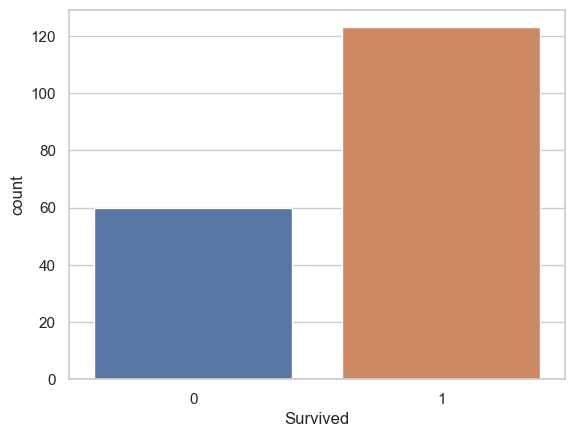

In [8]:
#DATA VISUALIZATION
sns.countplot(x='Survived',data=titanic);

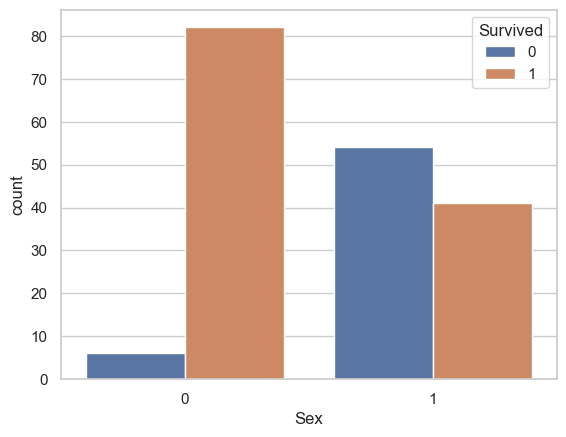

In [9]:
#low frequency of people who did not survived
sns.countplot(x='Sex',hue='Survived',data=titanic);

In [10]:
titanic.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [11]:
titanic=pd.get_dummies(titanic,columns=['Sex','Embarked'])
titanic

,Survived,Age,Fare,Cabin,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
1,1,38.0,71.2833,72,1,0,1,0,0
3,1,35.0,53.1000,48,1,0,0,0,1
6,0,54.0,51.8625,117,0,1,0,0,1
10,1,4.0,16.7000,131,1,0,0,0,1
11,1,58.0,26.5500,43,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,47.0,52.5542,91,1,0,0,0,1
872,0,33.0,5.0000,29,0,1,0,0,1
879,1,56.0,83.1583,61,1,0,1,0,0
887,1,19.0,30.0000,25,1,0,0,0,1


In [12]:
titanic.dtypes

Survived        int64
Age           float64
Fare          float64
Cabin           int32
Sex_0           uint8
Sex_1           uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [13]:
titanic.columns

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Sex_0', 'Sex_1', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [14]:
Y=titanic['Survived']
X=titanic.drop(['Survived'], axis=1)

In [15]:
X

,Age,Fare,Cabin,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
1,38.0,71.2833,72,1,0,1,0,0
3,35.0,53.1000,48,1,0,0,0,1
6,54.0,51.8625,117,0,1,0,0,1
10,4.0,16.7000,131,1,0,0,0,1
11,58.0,26.5500,43,1,0,0,0,1
...,...,...,...,...,...,...,...,...
871,47.0,52.5542,91,1,0,0,0,1
872,33.0,5.0000,29,0,1,0,0,1
879,56.0,83.1583,61,1,0,1,0,0
887,19.0,30.0000,25,1,0,0,0,1


In [16]:
Y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,train_size=0.8, random_state = 20)

In [18]:
X_train

,Age,Fare,Cabin,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
556,48.00,39.6000,1,1,0,1,0,0
311,18.00,262.3750,30,1,0,1,0,0
3,35.00,53.1000,48,1,0,0,0,1
305,0.92,151.5500,54,0,1,0,0,1
699,42.00,7.6500,126,0,1,0,0,1
...,...,...,...,...,...,...,...,...
715,19.00,7.6500,127,0,1,0,0,1
679,36.00,512.3292,29,0,1,1,0,0
745,70.00,71.0000,16,0,1,0,0,1
96,71.00,34.6542,9,0,1,1,0,0


In [19]:
Y_train

556    1
311    1
3      1
305    1
699    0
      ..
715    0
679    1
745    0
96     0
496    1
Name: Survived, Length: 146, dtype: int64

### DecisionTreeClassifier

In [20]:
model=DecisionTreeClassifier(criterion = "gini")
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_train, Y_train)

1.0

In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.7568


In [23]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [24]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 8  3]
 [ 6 20]]

True Positives(TP) =  8

True Negatives(TN) =  20

False Positives(FP) =  3

False Negatives(FN) =  6


<Axes: >

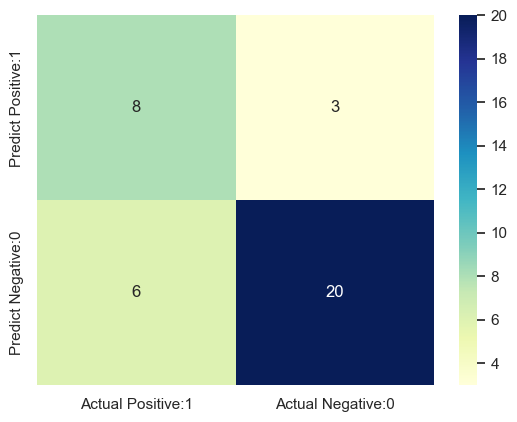

In [25]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.87      0.77      0.82        26

    accuracy                           0.76        37
   macro avg       0.72      0.75      0.73        37
weighted avg       0.78      0.76      0.76        37



In [27]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [28]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7568


In [29]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2432


#### INTERPRETATION FOR DT

Precision:

Class 0 Precision: 0.57
Class 1 Precision: 0.87
Precision measures the accuracy of positive predictions made by the model. For class 0, it correctly predicted 57% of the positive cases, while for class 1, it correctly predicted 87% of the positive cases. This suggests that when the model predicted class 1, it was correct 87% of the time.

Recall (Sensitivity):

Class 0 Recall: 0.73
Class 1 Recall: 0.77
Recall measures the ability of the model to correctly identify all positive instances. Class 0 has a recall of 73%, indicating that it captures a significant portion of the positive instances of class 0, while class 1 has a recall of 77%, suggesting it is effective at identifying most of the positive instances of class 1.

F1-Score:

Class 0 F1-Score: 0.64
Class 1 F1-Score: 0.82
The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Class 1 has a higher F1-score (0.82), indicating a better balance between precision and recall, while class 0 has a lower F1-score (0.64).


Training Set Score: It indicates the model's performance on the training dataset, and a score of 1.0 suggests that the model has achieved perfect accuracy on the training data, which might be a sign of overfitting.
Test Set Score: It represents the model's performance on the test dataset, and it's 0.7568 in this case, indicating that the model's performance is good but not perfect on unseen data.
In summary, this binary classification model appears to have decent performance. It achieves reasonably high precision and recall for both classes, and the F1-scores provide a balanced view of model performance. The weighted average metrics account for class imbalance. The training set score of 1.0 suggests potential overfitting, and further evaluation and tuning may be necessary to generalize well to new data.

### Random forest

In [30]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
model = RandomForestClassifier()

# Train the classifier on your training data (X_train, y_train)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
model.score(X_train, Y_train)

1.0

In [32]:
Y_test

550    1
630    1
539    1
645    1
591    1
291    1
329    1
577    1
262    0
585    1
174    0
88     1
456    0
632    1
21     1
809    1
263    0
205    0
681    1
802    1
759    1
336    0
671    0
789    0
268    1
337    1
889    1
872    0
763    1
523    1
857    1
724    1
257    1
453    1
748    0
609    1
75     0
Name: Survived, dtype: int64

In [33]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.7568


In [34]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

<Axes: >

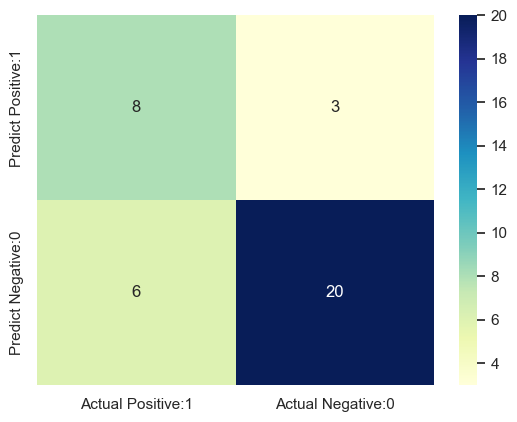

In [35]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [36]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.95      0.69      0.80        26

    accuracy                           0.76        37
   macro avg       0.75      0.80      0.74        37
weighted avg       0.83      0.76      0.77        37



#### INTERPRTATION FOR RANDOM FOREST

Precision:

Class 0 Precision: 0.56
Class 1 Precision: 0.95
Precision measures the accuracy of positive predictions made by the model. For class 0, it correctly predicted 56% of the positive cases, while for class 1, it correctly predicted 95% of the positive cases. In other words, when the model predicted class 1, it was correct 95% of the time.

Recall (Sensitivity):

Class 0 Recall: 0.91
Class 1 Recall: 0.69
Recall measures the ability of the model to correctly identify all positive instances. Class 0 has a higher recall (91%), indicating that it is better at capturing true positive instances of class 0, while class 1 has a lower recall (69%), suggesting that it misses some of the positive instances of class 1.

F1-Score:

Class 0 F1-Score: 0.69
Class 1 F1-Score: 0.80
The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. Class 1 has a higher F1-score (0.80), indicating a better overall balance between precision and recall, while class 0 has a lower F1-score (0.69).

Accuracy: The overall accuracy of the model is 76%. This metric tells us how many predictions were correct out of the total number of predictions.


Training Set Score: It indicates the model's performance on the training dataset, and a score of 1.0 suggests that the model has achieved perfect accuracy on the training data, which might be a sign of overfitting.
Test Set Score: It represents the model's performance on the test dataset, and it's 0.7568 in this case, indicating that the model's performance is good but not perfect on unseen data.
In summary, this classification model seems to perform reasonably well, with relatively high precision and recall for class 1 but lower recall for class 0. The F1-scores provide a balanced view of model performance, and the weighted average metrics account for class imbalance. The training set score of 1.0 suggests potential overfitting, and further evaluation and tuning may be necessary to generalize well to new data.





